In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
xls_data=pd.read_excel("./table.xlsx")

In [3]:
t2_dat=xls_data.loc[:,"# of turns":"HFSS"]

In [4]:
t3_dat=xls_data.loc[:,"# of turns.1":"HFSS.1"]

In [5]:
t4_dat=xls_data.loc[:,"# of turns.2":"HFSS.2"]

In [6]:
t2_dat=t2_dat.replace(np.nan,0)
t3_dat=t3_dat.replace(np.nan,0)
t4_dat=t4_dat.replace(np.nan,0)

In [7]:
def data_restore(dat):
    for col_name in dat.columns[:5]:
        temp=0
        for i in range(len(dat[col_name])):
            if (dat.loc[i,col_name]!=0):
                temp=dat.loc[i,col_name]
            if (dat.loc[i,col_name]==0):
                dat.loc[i,col_name]=temp
    return dat

In [8]:
t2_dat=data_restore(t2_dat)
t3_dat=data_restore(t3_dat)
t4_dat=data_restore(t4_dat)

In [9]:
total_dat_temp=np.vstack([t2_dat.values,t3_dat.values,t4_dat.values])

In [10]:
del_index=np.where(total_dat_temp[:,6]==0)[0]

In [11]:
total_dat_temp=pd.DataFrame(total_dat_temp,columns=t2_dat.columns)

In [12]:
total_dat=total_dat_temp.drop(del_index)

In [13]:
total_dat.to_csv("preprocessed_data.csv",
                 columns=total_dat.columns,sep=",", index=False)

In [14]:
data=total_dat.values

In [15]:
log_dat_x=np.log(data[:,:6])

In [16]:
pow_dat_x=np.power(data[:,:6],2)

In [17]:
log_dat_y=np.log(data[:,6])

In [18]:
x_train=np.hstack([log_dat_x,data[:,:6],pow_dat_x])

In [19]:
mean_x=np.mean(x_train, axis=0)
std_x=np.std(x_train, axis=0)

In [20]:
x_train=(x_train - mean_x) / std_x

In [21]:
mean_y=np.mean(log_dat_y)
std_y=np.std(log_dat_y)

In [22]:
y_train=(log_dat_y-mean_y)/std_y

In [23]:
x_train=torch.FloatTensor(x_train)
y_train=torch.FloatTensor(y_train)

In [24]:
model=nn.Linear(18,1)

In [25]:
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.0171,  0.1415,  0.0587,  0.2176, -0.1499, -0.0720,  0.1209,  0.0050,
          0.1265,  0.1896, -0.1992, -0.0458,  0.1191,  0.2171,  0.2013,  0.0132,
          0.2350, -0.0564]], requires_grad=True), Parameter containing:
tensor([0.0602], requires_grad=True)]


In [26]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [27]:
nb_epochs = 100000
for epoch in range(nb_epochs+1):

    prediction = torch.squeeze(model(x_train))
    cost = F.mse_loss(prediction, y_train) 
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/100000 Cost: 1.482777
Epoch  100/100000 Cost: 1.465533
Epoch  200/100000 Cost: 1.448507
Epoch  300/100000 Cost: 1.431695
Epoch  400/100000 Cost: 1.415096
Epoch  500/100000 Cost: 1.398705
Epoch  600/100000 Cost: 1.382521
Epoch  700/100000 Cost: 1.366542
Epoch  800/100000 Cost: 1.350764
Epoch  900/100000 Cost: 1.335186
Epoch 1000/100000 Cost: 1.319803
Epoch 1100/100000 Cost: 1.304615
Epoch 1200/100000 Cost: 1.289618
Epoch 1300/100000 Cost: 1.274809
Epoch 1400/100000 Cost: 1.260188
Epoch 1500/100000 Cost: 1.245751
Epoch 1600/100000 Cost: 1.231496
Epoch 1700/100000 Cost: 1.217420
Epoch 1800/100000 Cost: 1.203521
Epoch 1900/100000 Cost: 1.189798
Epoch 2000/100000 Cost: 1.176247
Epoch 2100/100000 Cost: 1.162868
Epoch 2200/100000 Cost: 1.149656
Epoch 2300/100000 Cost: 1.136610
Epoch 2400/100000 Cost: 1.123729
Epoch 2500/100000 Cost: 1.111010
Epoch 2600/100000 Cost: 1.098451
Epoch 2700/100000 Cost: 1.086050
Epoch 2800/100000 Cost: 1.073805
Epoch 2900/100000 Cost: 1.061714
Epoch 3000

Epoch 24800/100000 Cost: 0.163754
Epoch 24900/100000 Cost: 0.162947
Epoch 25000/100000 Cost: 0.162150
Epoch 25100/100000 Cost: 0.161362
Epoch 25200/100000 Cost: 0.160583
Epoch 25300/100000 Cost: 0.159813
Epoch 25400/100000 Cost: 0.159052
Epoch 25500/100000 Cost: 0.158299
Epoch 25600/100000 Cost: 0.157556
Epoch 25700/100000 Cost: 0.156821
Epoch 25800/100000 Cost: 0.156094
Epoch 25900/100000 Cost: 0.155376
Epoch 26000/100000 Cost: 0.154666
Epoch 26100/100000 Cost: 0.153964
Epoch 26200/100000 Cost: 0.153271
Epoch 26300/100000 Cost: 0.152585
Epoch 26400/100000 Cost: 0.151907
Epoch 26500/100000 Cost: 0.151237
Epoch 26600/100000 Cost: 0.150575
Epoch 26700/100000 Cost: 0.149920
Epoch 26800/100000 Cost: 0.149273
Epoch 26900/100000 Cost: 0.148633
Epoch 27000/100000 Cost: 0.148000
Epoch 27100/100000 Cost: 0.147375
Epoch 27200/100000 Cost: 0.146756
Epoch 27300/100000 Cost: 0.146145
Epoch 27400/100000 Cost: 0.145541
Epoch 27500/100000 Cost: 0.144943
Epoch 27600/100000 Cost: 0.144352
Epoch 27700/10

Epoch 49000/100000 Cost: 0.093714
Epoch 49100/100000 Cost: 0.093630
Epoch 49200/100000 Cost: 0.093547
Epoch 49300/100000 Cost: 0.093464
Epoch 49400/100000 Cost: 0.093382
Epoch 49500/100000 Cost: 0.093300
Epoch 49600/100000 Cost: 0.093219
Epoch 49700/100000 Cost: 0.093139
Epoch 49800/100000 Cost: 0.093058
Epoch 49900/100000 Cost: 0.092978
Epoch 50000/100000 Cost: 0.092899
Epoch 50100/100000 Cost: 0.092820
Epoch 50200/100000 Cost: 0.092742
Epoch 50300/100000 Cost: 0.092664
Epoch 50400/100000 Cost: 0.092586
Epoch 50500/100000 Cost: 0.092509
Epoch 50600/100000 Cost: 0.092432
Epoch 50700/100000 Cost: 0.092356
Epoch 50800/100000 Cost: 0.092280
Epoch 50900/100000 Cost: 0.092204
Epoch 51000/100000 Cost: 0.092129
Epoch 51100/100000 Cost: 0.092054
Epoch 51200/100000 Cost: 0.091980
Epoch 51300/100000 Cost: 0.091906
Epoch 51400/100000 Cost: 0.091833
Epoch 51500/100000 Cost: 0.091760
Epoch 51600/100000 Cost: 0.091687
Epoch 51700/100000 Cost: 0.091614
Epoch 51800/100000 Cost: 0.091542
Epoch 51900/10

Epoch 73600/100000 Cost: 0.080411
Epoch 73700/100000 Cost: 0.080371
Epoch 73800/100000 Cost: 0.080330
Epoch 73900/100000 Cost: 0.080290
Epoch 74000/100000 Cost: 0.080249
Epoch 74100/100000 Cost: 0.080209
Epoch 74200/100000 Cost: 0.080169
Epoch 74300/100000 Cost: 0.080129
Epoch 74400/100000 Cost: 0.080088
Epoch 74500/100000 Cost: 0.080048
Epoch 74600/100000 Cost: 0.080008
Epoch 74700/100000 Cost: 0.079968
Epoch 74800/100000 Cost: 0.079929
Epoch 74900/100000 Cost: 0.079889
Epoch 75000/100000 Cost: 0.079849
Epoch 75100/100000 Cost: 0.079809
Epoch 75200/100000 Cost: 0.079770
Epoch 75300/100000 Cost: 0.079730
Epoch 75400/100000 Cost: 0.079691
Epoch 75500/100000 Cost: 0.079651
Epoch 75600/100000 Cost: 0.079611
Epoch 75700/100000 Cost: 0.079572
Epoch 75800/100000 Cost: 0.079532
Epoch 75900/100000 Cost: 0.079493
Epoch 76000/100000 Cost: 0.079453
Epoch 76100/100000 Cost: 0.079414
Epoch 76200/100000 Cost: 0.079375
Epoch 76300/100000 Cost: 0.079335
Epoch 76400/100000 Cost: 0.079296
Epoch 76500/10

Epoch 97800/100000 Cost: 0.071638
Epoch 97900/100000 Cost: 0.071605
Epoch 98000/100000 Cost: 0.071572
Epoch 98100/100000 Cost: 0.071540
Epoch 98200/100000 Cost: 0.071507
Epoch 98300/100000 Cost: 0.071474
Epoch 98400/100000 Cost: 0.071441
Epoch 98500/100000 Cost: 0.071409
Epoch 98600/100000 Cost: 0.071376
Epoch 98700/100000 Cost: 0.071343
Epoch 98800/100000 Cost: 0.071311
Epoch 98900/100000 Cost: 0.071278
Epoch 99000/100000 Cost: 0.071245
Epoch 99100/100000 Cost: 0.071213
Epoch 99200/100000 Cost: 0.071180
Epoch 99300/100000 Cost: 0.071148
Epoch 99400/100000 Cost: 0.071115
Epoch 99500/100000 Cost: 0.071082
Epoch 99600/100000 Cost: 0.071050
Epoch 99700/100000 Cost: 0.071017
Epoch 99800/100000 Cost: 0.070985
Epoch 99900/100000 Cost: 0.070952
Epoch 100000/100000 Cost: 0.070919


In [28]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.1477, -0.0297, -0.0612,  0.0907, -0.1392, -0.4775, -0.0447, -0.1571,
          0.0066,  0.0626, -0.2044, -0.2709, -0.0457,  0.0754,  0.0814, -0.1137,
          0.2172, -0.1623]], requires_grad=True), Parameter containing:
tensor([0.0082], requires_grad=True)]


In [29]:
x=np.squeeze(model(x_train).detach().numpy())

In [30]:
y=y_train.detach().numpy()

In [31]:
x.shape

(468,)

In [32]:
y.shape

(468,)

<function matplotlib.pyplot.show(*args, **kw)>

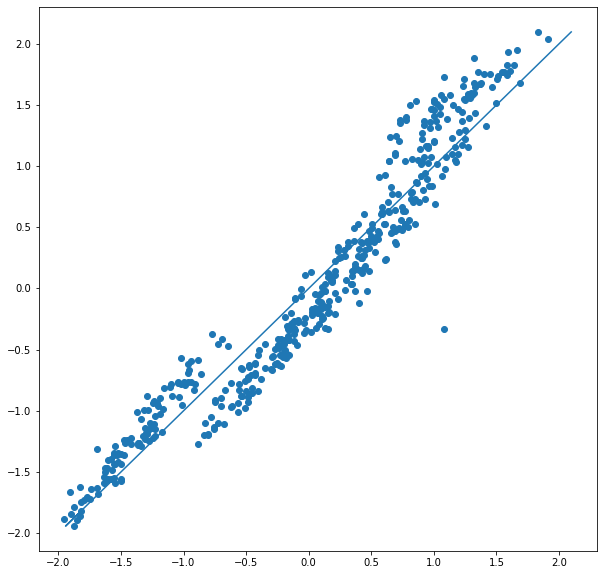

In [33]:
plt.figure(figsize=(10,10))
plt.plot(y,y)
plt.scatter(x, y)
plt.show